# The Data Legend (my capstone)

## The bans analysis

#### Author: Hussain AlAttas (RUH)

---
**In this notebook, I try to predict the success of a champion depending on the number of times they get banned***

*In a match, each team can pick 5 different champions and ban the other team from picking those champions.

In [164]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [165]:
# Loading the data
LOL = pd.read_csv('./LeagueofLegends.csv').dropna()
Match_info = pd.read_csv('./matchinfo.csv')
Bans = pd.read_csv('./bans.csv').drop('Address',axis=1).dropna()
Monsters = pd.read_csv('./monsters.csv')
Structures = pd.read_csv('./structures.csv')

In [166]:
Bans.drop('Team',axis=1, inplace=True) # An unnecessary column 

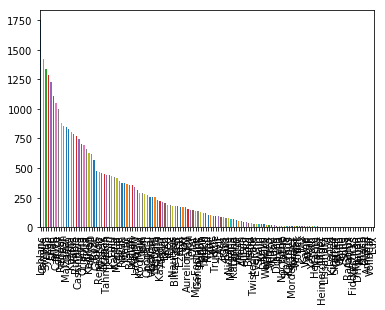

In [167]:
# Collecting the number of bans for each champion

bans = []

for i in Bans.columns:
    for x in Bans[i]:
        bans.append(x)

dict(pd.Series(bans).value_counts())

pd.Series(bans).value_counts().plot(kind='bar')

In [168]:
# Using linear regression

lr = LinearRegression()
X = pd.get_dummies(pd.DataFrame(list(set(bans))))
y = pd.Series(bans).value_counts()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

-0.022314729524127497